Sept. 2021

Crunches data from the subsampling experiments made by running fit_mante_subs.py twice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from low_rank_rnns import plotting as plot

In [2]:
plot.setup_matplotlib()

plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 20

In [3]:
dic = np.load('../data/mante_subsampling.npz')
r2s_lr, accs_lr, losses_lr, r2s_fr, accs_fr, losses_fr = [dic[f'arr_{i}'] for i in range(6)]

dic = np.load('../data/mante_subsampling_more.npz')
r2s_lr2, accs_lr2, losses_lr2, r2s_fr2, accs_fr2, losses_fr2 = [dic[f'arr_{i}'] for i in range(6)]

ps = np.array([1., .8, .6, .4, .2, .15, .1, .05, .02, .01])

In [4]:
r2s_lr = np.concatenate([r2s_lr, r2s_lr2])
r2s_fr = np.concatenate([r2s_fr, r2s_fr2])
print(r2s_lr.shape)
print(r2s_fr.shape)

(10, 10)
(10, 10)


In [5]:
accs_lr = np.concatenate([accs_lr, accs_lr2])
accs_fr = np.concatenate([accs_fr, accs_fr2])


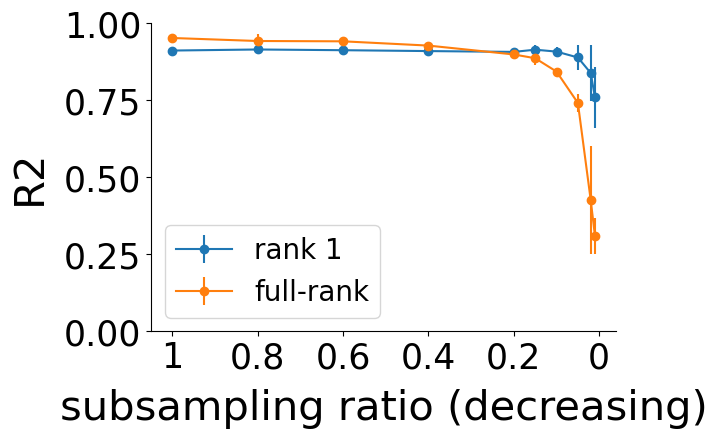

In [6]:
plt.errorbar(x=1-ps, y=r2s_lr.mean(axis=1), yerr=2*r2s_lr.std(axis=1), marker='o', label='rank 1')
plt.errorbar(x=1-ps, y=r2s_fr.mean(axis=1), yerr=2*r2s_fr.std(axis=1), marker='o', label='full-rank')
plt.ylim(0, 1)
plt.xticks([0, .2, .4, .6, .8, 1], [1, .8, .6, .4, .2, 0])
plt.xlabel('subsampling ratio (decreasing)')
plt.ylabel('R2')

plt.legend()
# plt.savefig('../figures/neurips/subsampling1.pdf', bbox_inches='tight')

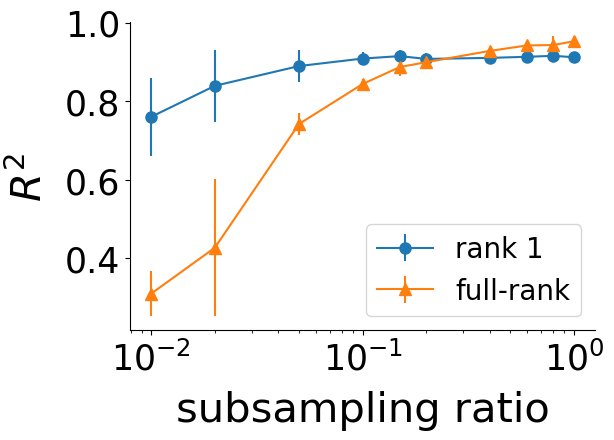

In [7]:
plt.semilogx()
plt.errorbar(x=ps, y=r2s_lr.mean(axis=1), yerr=2*r2s_lr.std(axis=1), marker='o', label='rank 1', markersize=8)
plt.errorbar(x=ps, y=r2s_fr.mean(axis=1), yerr=2*r2s_fr.std(axis=1), marker='^', label='full-rank', markersize=9)
# plt.ylim(0, 1)
# plt.xticks([0, .2, .4, .6, .8, 1], [1, .8, .6, .4, .2, 0])
plt.xlabel('subsampling ratio')
plt.ylabel('$R^2$')

plt.legend()
plt.savefig('../figures/neurips/subsampling1.pdf', bbox_inches='tight')

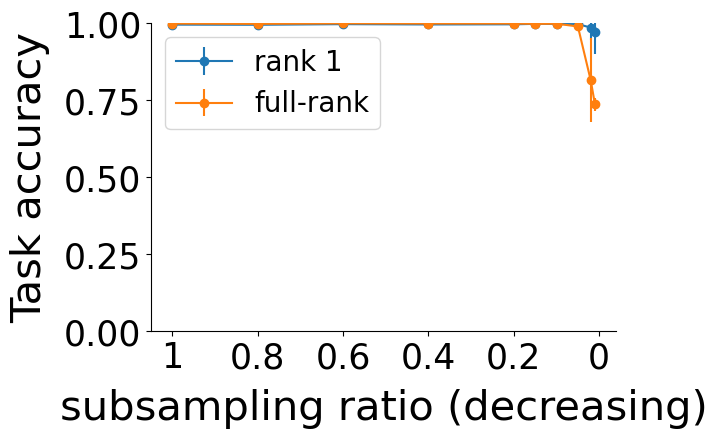

In [8]:
plt.errorbar(x=1-ps, y=accs_lr.mean(axis=1), yerr=2*accs_lr.std(axis=1), marker='o', label='rank 1')
plt.errorbar(x=1-ps, y=accs_fr.mean(axis=1), yerr=2*accs_fr.std(axis=1), marker='o', label='full-rank')
plt.ylim(0, 1)
plt.xticks([0, .2, .4, .6, .8, 1], [1, .8, .6, .4, .2, 0])
plt.xlabel('subsampling ratio (decreasing)')
plt.ylabel('Task accuracy')

plt.legend()
# plt.savefig('../figures/bernstein/subsampling2.pdf', bbox_inches='tight')

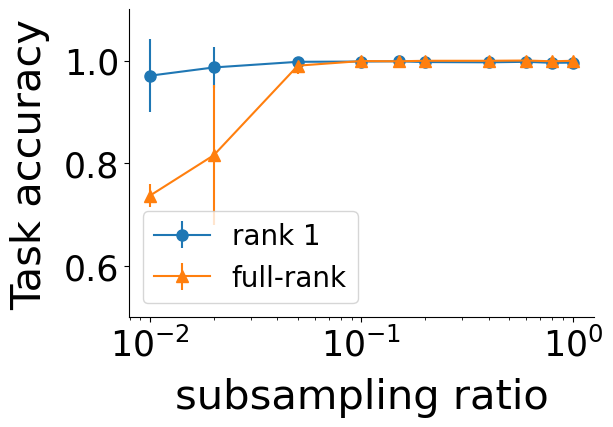

In [9]:
plt.semilogx()
plt.errorbar(x=ps, y=accs_lr.mean(axis=1), yerr=2*accs_lr.std(axis=1), marker='o', label='rank 1', markersize=8)
plt.errorbar(x=ps, y=accs_fr.mean(axis=1), yerr=2*accs_fr.std(axis=1), marker='^', label='full-rank', markersize=9)
plt.ylim(0.5, 1.1)
# plt.xticks([0, .2, .4, .6, .8, 1], [1, .8, .6, .4, .2, 0])
plt.xlabel('subsampling ratio')
plt.ylabel('Task accuracy')

plt.legend()
plt.savefig('../figures/neurips/subsampling2.pdf', bbox_inches='tight')